# Proyecto para gender prediction

importamos librerias

In [17]:
import os
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import PIL
import PIL.Image
import pathlib
import matplotlib.pyplot as plt
import os
from tensorflow.keras import layers

In [7]:
batch_size = 32
img_height = 218
img_width = 178
data_dir='gender_images\Dataset\Train'
data_dir_test='gender_images\Dataset\Test'
data_dir_Validation='gender_images\Dataset\Validation'



In [8]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
    seed=123,
    labels = 'inferred',
    image_size=(img_height, img_width),
    batch_size=batch_size)

dataset_test = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
    seed=123,
    labels = 'inferred',
    image_size=(img_height, img_width),
    batch_size=batch_size)

dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
    seed=123,
    labels = 'inferred',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 160000 files belonging to 2 classes.
Found 160000 files belonging to 2 classes.
Found 160000 files belonging to 2 classes.


In [9]:
class_names = dataset_train.class_names
print(class_names)

['Female', 'Male']


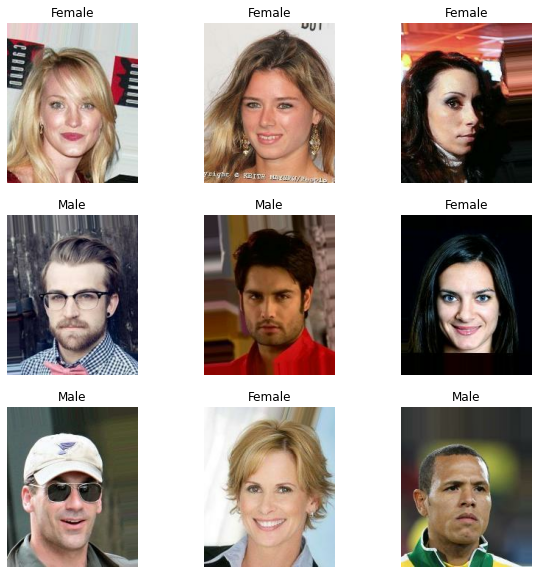

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in dataset_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
from tensorflow.keras.optimizers import Adam

In [18]:
num_classes = 2

model = models.Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [22]:
opt = Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt)

In [23]:
historic = model.fit(dataset_train,epochs= 128,validation_data=dataset_validation)

Epoch 1/128
 169/5000 [>.............................] - ETA: 53:21 - loss: 409.6098

KeyboardInterrupt: 